In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier, EasyEnsembleClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from collections import Counter

In [2]:
X,y =make_classification(n_samples=5000, n_features=2, n_informative=2, n_classes=3, n_clusters_per_class=1,
                        n_redundant=0,n_repeated=0,weights=[0.01,0.05,0.94],class_sep=0.8,random_state=0)
print("Dados em cada uma das classes",sorted(Counter(y).items()))

Dados em cada uma das classes [(0, 64), (1, 262), (2, 4674)]


## Bagging Classifier

O método bagging faz uso de vários estimadores aplicados a diferentes amostras selecionadas aleatóriamente, mas acaba priorizando a classe com maior número de dados. Veja abaixo que treinamos o nosso "classificador" e depois testamos o mesmo para saber se obteve um bom resultado. Nosso conjunto de teste tem o seguinte número de dados em cada um das classes: classe0: 12, classe1: 59 e classe2: 1179. Ao aplicar o "classificador" nesse conjunto de dados obtemos como resultado um score de 0.88. A confusion matrix mostra que erramos pouco.

In [3]:
# Bagging Classifier
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0)
print("Dados para teste: ",sorted(Counter(y_test).items()))
bc=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0)
m1=bc.fit(x_train,y_train)
y_pred1=m1.predict(x_test)
print("Dados rebalanceados: ",sorted(Counter(y_pred1).items()))
print("Score para BC usando Decision Tree:", balanced_accuracy_score(y_test,y_pred1))
confusion_matrix(y_test,y_pred1)

Dados para teste:  [(0, 12), (1, 59), (2, 1179)]
Dados rebalanceados:  [(0, 10), (1, 61), (2, 1179)]
Score para BC usando Decision Tree: 0.8864390007810891


array([[   9,    1,    2],
       [   0,   54,    5],
       [   1,    6, 1172]])

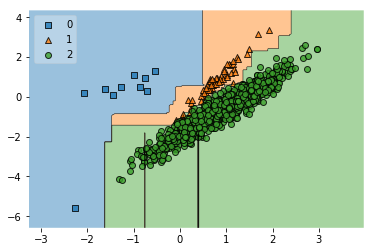

In [4]:
plot_decision_regions(X=x_test,y=y_pred1,clf=m1,legend=2)

In [9]:
bc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=2087557356, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=132990059, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fr

Agora podemos tentar um outro classificador para fazer o rebalanceamento nas estimativas. Nesse caso, usamos o método "BalancedBaggingClassifier". Esse faz um "resample" de cada um dos subconjunto de dados da amotra para treinar cada um dos estimadores para depois combinar os resultados. Nesse caso, veja a diferença de classificação da classe0 e classe1 em relação ao primeiro método.

In [16]:
# Balanced Bagging classifier
bbc=BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='auto',
                             replacement=False,random_state=0)
m2=bbc.fit(x_train,y_train)
y_pred2=m2.predict(x_test)
print("Dados rebalanceados: ",sorted(Counter(y_pred2).items()))
print("Score para BC usando Decision Tree:", balanced_accuracy_score(y_test,y_pred2))
confusion_matrix(y_test,y_pred2)

Dados rebalanceados:  [(0, 51), (1, 102), (2, 1097)]
Score para BC usando Decision Tree: 0.8691879549364346


array([[   9,    1,    2],
       [   0,   55,    4],
       [  42,   46, 1091]])

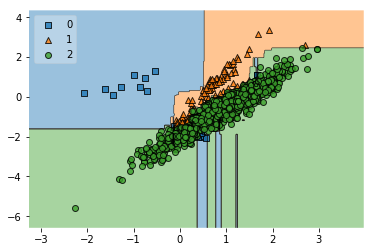

In [17]:
plot_decision_regions(X=x_test,y=y_pred2,clf=m2,legend=2)

No método ensemble usado a seguir cada uma das árvores da floresta tem uma amostra que é balanceada via bootstrap.

In [18]:
# Forest of randomized trees
brf=BalancedRandomForestClassifier(n_estimators=100,random_state=0)
m3=brf.fit(x_train,y_train)
y_pred3=m3.predict(x_test)
print("Dados rebalanceados: ",sorted(Counter(y_pred3).items()))
print("Score para BC usando Decision Tree:", balanced_accuracy_score(y_test,y_pred3))
confusion_matrix(y_test,y_pred3)

Dados rebalanceados:  [(0, 34), (1, 88), (2, 1128)]
Score para BC usando Decision Tree: 0.8779524446169549


array([[   9,    1,    2],
       [   0,   55,    4],
       [  25,   32, 1122]])

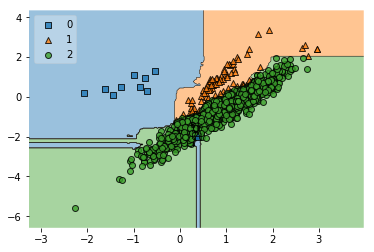

In [19]:
plot_decision_regions(X=x_test,y=y_pred3,clf=m3,legend=2)

Por fim, podemos usar o Boosting, que tem duas opções: RUSBoostClassifier e EasyEnsembleClassifier

In [23]:
# RUSBoostClassifier
rus=RUSBoostClassifier(random_state=0)
m4=rus.fit(x_train,y_train)
y_pred4=m4.predict(x_test)
print("Dados rebalanceados: ",sorted(Counter(y_pred4).items()))
print("Score para BC usando Decision Tree:", balanced_accuracy_score(y_test,y_pred4))
confusion_matrix(y_test,y_pred4)

Dados rebalanceados:  [(0, 14), (1, 336), (2, 900)]
Score para BC usando Decision Tree: 0.8134910366440966


array([[  9,   1,   2],
       [  0,  55,   4],
       [  5, 280, 894]])

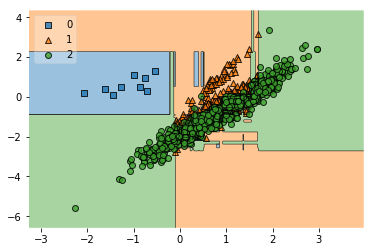

In [25]:
plot_decision_regions(X=x_test,y=y_pred4,clf=m4,legend=2)

In [24]:
# EasyEnsembleClassifier
eec=EasyEnsembleClassifier(random_state=0)
m5=eec.fit(x_train,y_train)
y_pred5=m5.predict(x_test)
print("Dados rebalanceados: ",sorted(Counter(y_pred5).items()))
print("Score para BC usando Decision Tree:", balanced_accuracy_score(y_test,y_pred5))
confusion_matrix(y_test,y_pred5)

Dados rebalanceados:  [(0, 266), (1, 98), (2, 886)]
Score para BC usando Decision Tree: 0.7931491784189416


array([[  9,   1,   2],
       [  5,  52,   2],
       [252,  45, 882]])

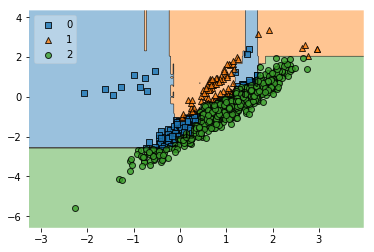

In [26]:
plot_decision_regions(X=x_test,y=y_pred5,clf=m5,legend=2)

Uma boa discussão sobre o tema pode ser vista em:
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/ 